In [84]:
print('hello world')

hello world


In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


\begin{align}
\frac{d P}{dt} & = (\mu-g)P \\
\end{align}

# Fleming's Reasoning
Observations:
- we see phytoplankton form dense blooms, diatoms specifically
- many physical factors affect diatoms: nutrients, light, mixing
- Diatoms generally bloom in non-limiting conditions
- A bloom is formed, but reaches a maximum density after days or weeks and then declines
- Nutrients continue to be drawn down after maximum density is reached


let's assume:
- no physically limiting factors (i.e. nutrients, light, etc.)
- no strong mixing


in our model: diatom growth remains constant

if so: Decline in bloom must be caused by net negative production

what can cause this, when growth remains constant?
- sinking
- death and decomposition
- grazing


```Harvey et al. consider that sinking is an extremely slow process and imply that diatoms rarely, if ever, die a "natural death". Hence it follows that grazing must be the main factor which will reduce the diatom population.```






might sound overtly simplistic, but think about physics: 
- newton's laws don't every truly apply in nature, still much was learned from them
    
That's why ecologists, complaining that a model does not include their specific process (that is definitely very important), is not always productive or reasonable ;) 

# Let's code the very first phytoplankton model


\begin{align}
\frac{d P}{dt} & = (\mu-g)P \\
\end{align}

with previous assumptions, we aditionally assume that grazing increases linearly over time 

\begin{align}
g & = b + c \cdot t \\
\end{align}

where $b$ is the initial grazing rate, and $c$ the rate at which grazing increases over time

which yields our final model formulation:

\begin{align}
\frac{d P}{dt} & = (\mu-(b + c \cdot t))P \\
\end{align}

In [86]:
def flemingsmodel(P, t):
    gr = b + c * t
    mu = a
    
    dPdt = (mu - gr) * P
    
    return dPdt

In [87]:
#exemplary parameters:
a = 1        # growth rate
b = 0.5      # initial grazing rate
c = 0.05     # grazing increase rate

# what does the function do?
flemingsmodel(0.495,2)

In [88]:
# solving the model discretely:

# exemplary parameters:
a = 1        # growth rate
b = 0.5      # initial grazing rate
c = 0.05     # grazing increase rate

# init:
tmax = 30
t=[0]
P=[1]
dPdt = [flemingsmodel(P[0],t[0])]
Prod = [0]

timestep = 0.1

In [89]:
# solve:
while t[-1] < tmax:
    # calculate dPdt and add to list
    dPdt.append(flemingsmodel(P[-1],t[-1]))
    
    # add dPdt to P from previous step
    P.append(P[-1] + dPdt[-1] * timestep)
    
    # add timestep
    t.append(t[-1] + timestep)

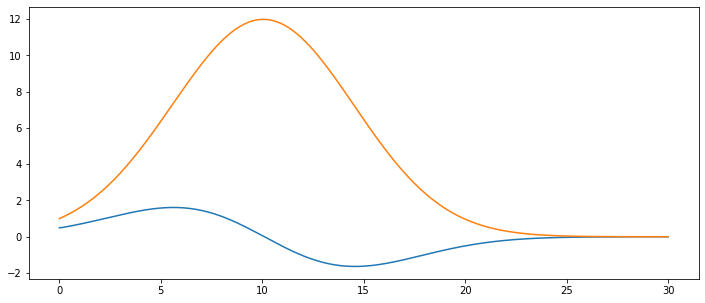

In [90]:
# plot:
plt.plot(t, dPdt) # plot derivative
plt.plot(t, P)   # plot actual biomass

In [91]:
# let's get some help with integrating our model:
from scipy.integrate import odeint

# the odeint function includes all kinds of bells and whistles, automatically checks our timesteps

In [92]:
modeltime = np.linspace(0,30,100) # this is the resolution of odeint output (not stepsize)

P0 = 1

# exemplary parameters:
a = 1        # growth rate
b = 0.5      # initial grazing rate
c = 0.05     # grazing increase rate

P_out = odeint(flemingsmodel, P0, modeltime)
#P_out

Text(0, 0.5, 'Arbitrary phytoplankton units [X $m^{-3}$]')

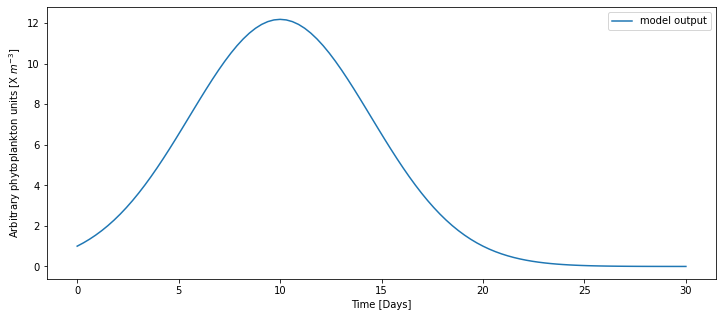

In [93]:
# Plot output:
plt.plot(modeltime, P_out, label='model output')
plt.legend()

plt.xlabel('Time [Days]')
plt.ylabel('Arbitrary phytoplankton units [X $m^{-3}$]')

# now let's look at the data

In [94]:
# copied from the plots in Fleming, 1939:
time = np.array([0, 18, 25, 35, 40, 48,58,68])
plantpigment = np.array([500, 2000, 1400, 4000, 1200, 1210,1250,200])

Text(0.5, 1.0, 'Spring diatom bloom in the English Channel (Harvey et al. 1934)')

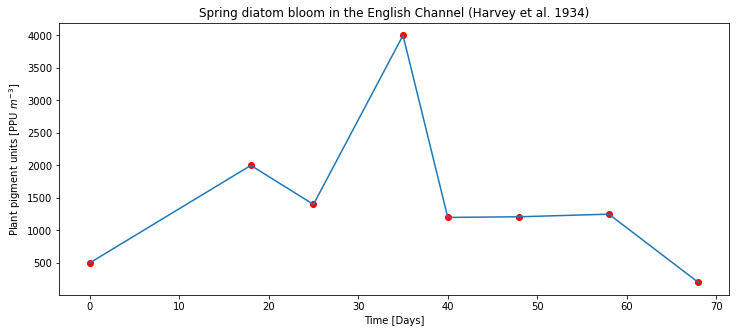

In [95]:
# let's plot this data:
plt.scatter(time, plantpigment, c='r', label='field data')
plt.plot(time, plantpigment)

plt.xlabel('Time [Days]')
plt.ylabel('Plant pigment units [PPU $m^{-3}$]')
plt.title('Spring diatom bloom in the English Channel (Harvey et al. 1934)')

# How does our Model compare to field data?

what Fleming did was 
1. integrate the function
2. define all parameters as ratios between the maximum density, where $a = b + c \cdot T$
3. calculate specific parameters to fit the starting conditions and the maximum density

First, let's plot our previous model setup and the data together

Text(0, 0.5, 'Plant pigment units [PPU $m^{-3}$]')

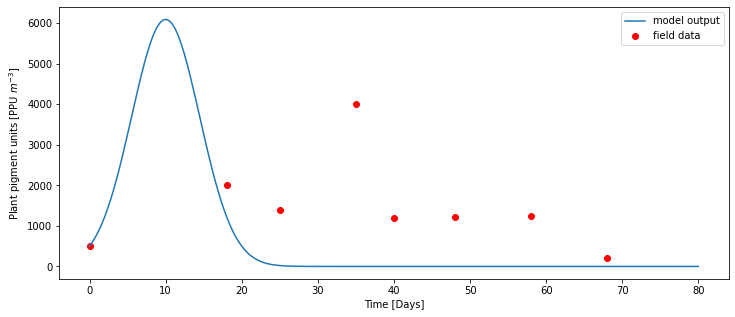

In [96]:
modeltime = np.linspace(0,80,200) # this is the resolution of odeint output (not stepsize)

P0 = 500  # change to 500

# exemplary parameters:
a = 1        # growth rate
b = 0.5      # initial grazing rate
c = 0.05     # grazing increase rate

P_out = odeint(flemingsmodel, P0, modeltime)

plt.plot(modeltime, P_out, label='model output')
plt.scatter(time, plantpigment, c='r', label='field data')
plt.legend()

plt.xlabel('Time [Days]')
plt.ylabel('Plant pigment units [PPU $m^{-3}$]')

Text(0, 0.5, 'Plant pigment units [PPU $m^{-3}$]')

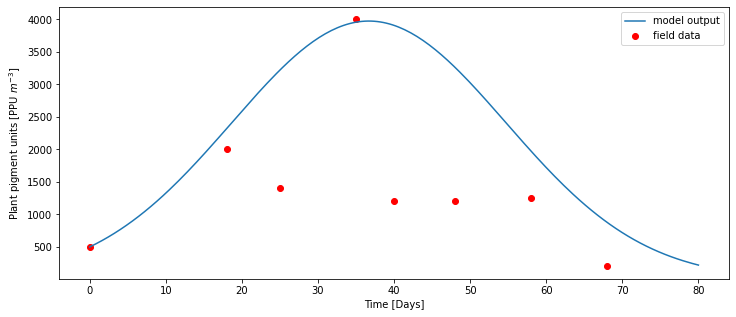

In [97]:
# let's try the parameters from Fleming, 1939
P0 = 500

a = .462     # growth rate
b = 0.349    # initial grazing rate
c = 0.00308  # grazing increase rate

P_out = odeint(flemingsmodel, P0, modeltime)

plt.plot(modeltime, P_out, label='model output')
plt.scatter(time, plantpigment, c='r', label='field data')
plt.legend()


plt.xlabel('Time [Days]')
plt.ylabel('Plant pigment units [PPU $m^{-3}$]')

So now we have some estimate of our growth and grazing rates, yay!

### Fleming acknowledges that this fit isn't too great, but he has an explanation:
- Zooplankton grazing is not constant
- in fact it is quite variable

but he has another way to show that his model is not completely off: nutrient data from the same time

In [98]:
# copy the data from publication
time = np.array([0, 18, 25, 35, 40, 48,58,68])
po3_consumption = np.array([0, 0.9, 5.5, 4, 6.2, 6.2, 9.1, 10])

po3 = 16 - po3_consumption

Text(0.5, 1.0, 'Phosphate observations over the time of the bloom (Harvey et al. 1934)')

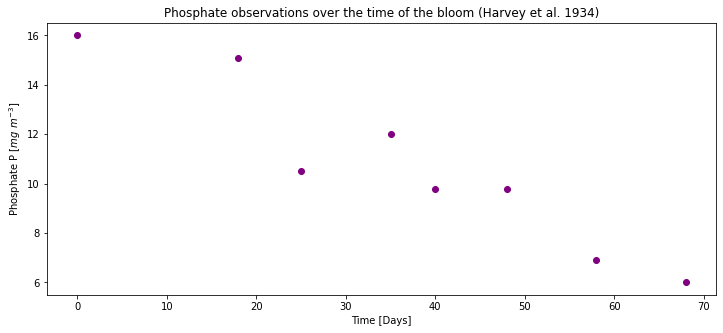

In [99]:
plt.scatter(time, po3, c='purple')

plt.xlabel('Time [Days]')
plt.ylabel('Phosphate P [$mg \ m^{-3}$]')
plt.title('Phosphate observations over the time of the bloom (Harvey et al. 1934)')

Text(0, 0.5, 'Plant pigment units [PPU $m^{-3}$]')

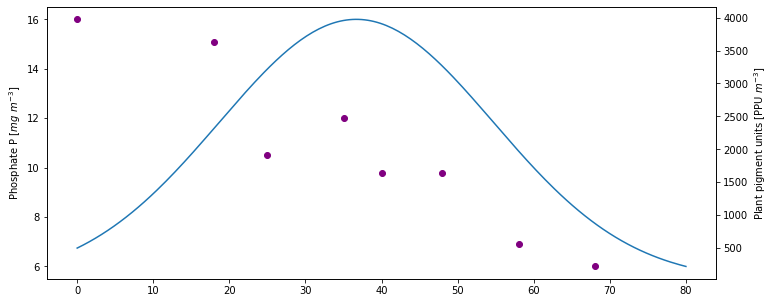

In [100]:
fig, ax1 = plt.subplots()

ax1.scatter(time, po3, c='purple')

ax2 = ax1.twinx()

ax2.plot(modeltime, P_out, label='model output')


plt.xlabel('Time [Days]')
ax1.set_ylabel('Phosphate P [$mg \ m^{-3}$]')
ax2.set_ylabel('Plant pigment units [PPU $m^{-3}$]')

# now our model actually brings some added value: we can estimate total production!


we just need to integrate our biomass, to get the total biomass produced over time


# Just for a quick comparison, this is what Fleming had to do:
![](assets/integrated_equations_fleming.jpg)

Text(0, 0.5, 'Plant pigment units [PPU $m^{-3}$]')

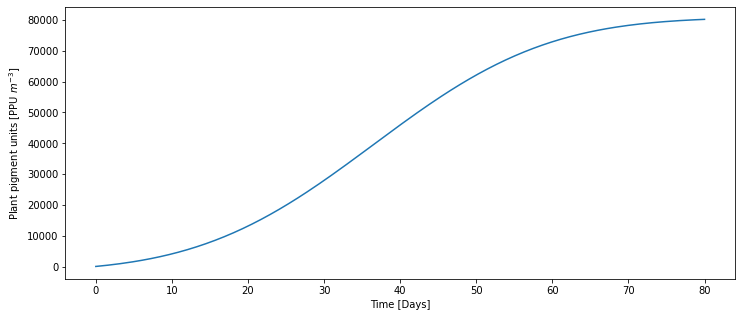

In [101]:
# integration is summing up below the line

TotalProduction = a * np.cumsum(P_out[:,0]/200*80)


plt.plot(modeltime,TotalProduction)

plt.xlabel('Time [Days]')
plt.ylabel('Plant pigment units [PPU $m^{-3}$]')


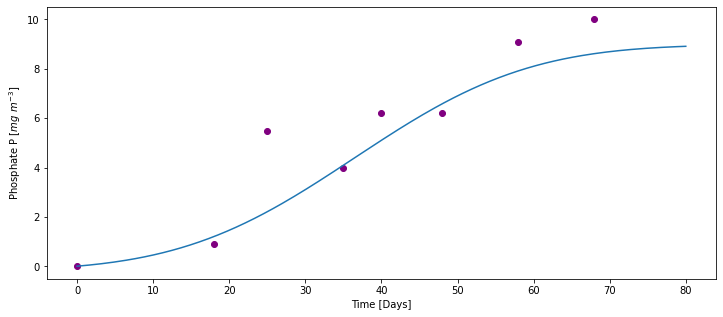

In [102]:
# assumption is that 9000 plankton pigment units, correspond to 1 mg of phosphorus being drawn down
plt.plot(modeltime, TotalProduction / 9000)

plt.xlabel('Time [Days]')
plt.ylabel('Phosphate P [$mg \ m^{-3}$]')

plt.scatter(time, po3_consumption, c='purple')

# now we have a very simple model, but what if we want to make it more complex?

For example, we could use my phydra package!

# Now let's move into the "phydra" framework:

In [103]:
import xsimlab as xs 

from phydra import Phytoplankton, ConstantGrowth, Grazing

In [104]:
TestMod = xs.Model({'P':Phytoplankton, 'Growth': ConstantGrowth, 'Grazing':Grazing})
TestMod

<xsimlab.Model (3 processes, 5 inputs)>
Growth
    mu          [in] constant growth rate of phytoplankton
Grazing
    b           [in] initial grazing rate
    c           [in] grazing increase rate
P
    dim         [in]
    state    [inout] () or ('env', 'P') 

In [105]:
in_ds = xs.create_setup(
    model=TestMod,
    clocks={   
        'time': np.linspace(0,80,500),
    },
    input_vars={ 'P':{'dim':1,'state':np.array([[1.]],dtype='float64')},
        
        'Growth__mu':.5,
        'Grazing':{'b':.1, 'c':.01}
    },
    output_vars={
        'P__state':'time',
    }
)

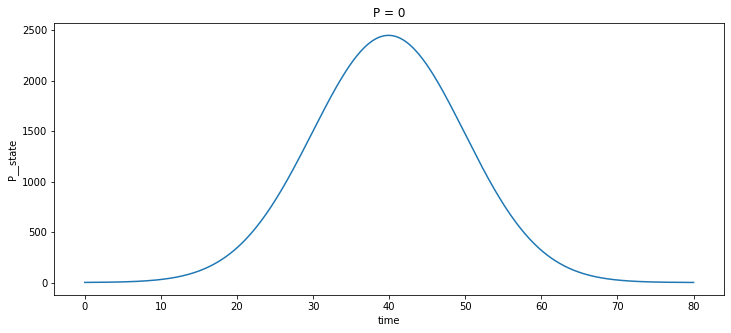

In [106]:
with TestMod:
    out_ds = in_ds.xsimlab.run()
    
out_ds.P__state.plot(x='time')

Now let's add some complexity:

In [107]:
from phydra import Zooplankton, ZooGrazing

TestMod2 = xs.Model({'P':Phytoplankton, 'Z':Zooplankton, 'Growth': ConstantGrowth, 'Grazing':ZooGrazing})
TestMod2

<xsimlab.Model (4 processes, 7 inputs)>
Growth
    mu          [in] constant growth rate of phytoplankton
Grazing
    b           [in] initial grazing rate
    c           [in] grazing increase rate
P
    dim         [in]
    state    [inout] () or ('env', 'P') 
Z
    dim         [in]
    state    [inout] () or ('env', 'Z') 

In [108]:
import numpy as np

In [109]:
in_ds = xs.create_setup(
    model=TestMod2,
    clocks={   
        'time': np.linspace(0,80,500),
    },
    input_vars={ 
        'P':{'dim':1,'state':np.array([[1.]],dtype='float64')},
        'Z':{'dim':1,'state':np.array([[.5]],dtype='float64')},
        
        'Growth__mu':.5,
        'Grazing':{'b':.1, 'c':.01}
        
    },
    output_vars={
        'P__state':'time',
        'Z__state':'time'
    }
)

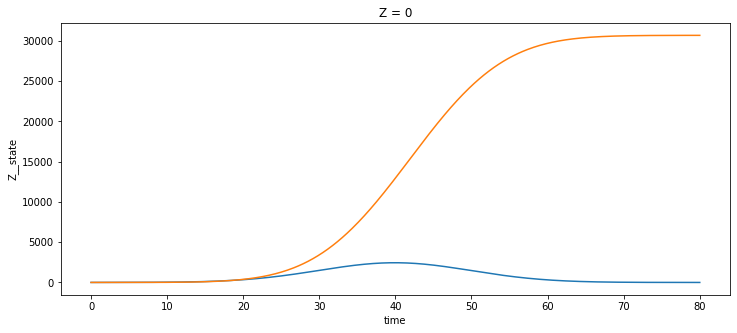

In [110]:
with TestMod2:
    out_ds = in_ds.xsimlab.run()
    
out_ds.P__state.plot(x='time')

out_ds.Z__state.plot(x='time')